In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from models import test_LSTM
from torch.utils.data import DataLoader
from torchvision import transforms
import pandas as pd
from preprocess import data_split,normalize_data
import matplotlib.pyplot as plt
import numpy as np


In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
DATASET_ROOT = './'

df = pd.read_csv("./STT.csv", index_col = 0)

STT = df[df.symbol == 'STT'].copy()
#print(GOOG)
STT.drop(['symbol'],1,inplace=True)
STT_new = normalize_data(STT)
#print(GOOG_new)

In [3]:
window = 15
X_train, y_train, X_test, y_test = data_split(STT_new, window)

INPUT_SIZE = 5
HIDDEN_SIZE = 64
NUM_LAYERS = 1
OUTPUT_SIZE = 1

learning_rate = 0.001
num_epochs = 50

/home/color/ml_hw5/preprocess.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = stock.as_matrix()


In [4]:
rnn = test_LSTM(input_dim=INPUT_SIZE,hidden_dim=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_dim=OUTPUT_SIZE)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

rnn.to(device)
rnn.train()

test_LSTM(
  (lstm): LSTM(5, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

In [5]:
train_loss_list = []
epoch_list = []
for epoch in range(num_epochs):
    for inputs, label in zip(X_train,y_train):
        inputs = torch.from_numpy(inputs).float().to(device)
        label = torch.from_numpy(np.array(label)).float().to(device)
        optimizer.zero_grad()

        output =rnn(inputs) # forward   
        loss=criterion(output,label) # compute loss
        loss.backward() #back propagation
        optimizer.step() #update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))
    train_loss_list.append(loss)
    epoch_list.append(epoch+1)
# above for train

epoch 0, loss 0.017609763890504837
epoch 1, loss 0.014378839172422886
epoch 2, loss 0.012886048294603825
epoch 3, loss 0.012133855372667313
epoch 4, loss 0.011706252582371235
epoch 5, loss 0.01142098568379879
epoch 6, loss 0.011204004287719727
epoch 7, loss 0.011024203151464462
epoch 8, loss 0.010869134217500687
epoch 9, loss 0.010732465423643589
epoch 10, loss 0.010610918514430523
epoch 11, loss 0.010502127930521965
epoch 12, loss 0.01040131226181984
epoch 13, loss 0.010305681265890598
epoch 14, loss 0.010213376954197884
epoch 15, loss 0.010123083367943764
epoch 16, loss 0.010034401901066303
epoch 17, loss 0.00994714256376028
epoch 18, loss 0.009861608035862446
epoch 19, loss 0.009777960367500782
epoch 20, loss 0.009696356020867825
epoch 21, loss 0.009617472998797894
epoch 22, loss 0.009540521539747715
epoch 23, loss 0.009466485120356083
epoch 24, loss 0.009395421482622623
epoch 25, loss 0.009327705018222332
epoch 26, loss 0.009263576939702034
epoch 27, loss 0.009203104302287102
epoch

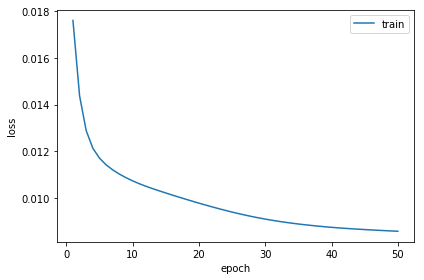

In [6]:
plt.plot(epoch_list, train_loss_list, label='train')
#plt.plot(test_epoch_list, test_loss_list, label='test')
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.legend(['train','test'], loc='upper right')
plt.legend(['train'], loc='upper right')
plt.savefig("loss.png",dpi=250,format="png")
plt.tight_layout()
plt.show()

In [7]:
#result = []
#with torch.no_grad():
#    for inputs, label in zip(X_test,y_test):
#        inputs = torch.from_numpy(inputs).float().to(device)
#        label = torch.from_numpy(np.array(label)).float().to(device)
#        output =rnn(inputs)    
#        result.append(output)
#result =np.array(result)
# above for test

In [8]:
result = []
testing_corrects = 0
test_acc_list = [] 
test_epoch_list = []
valid_loss = 0

with torch.no_grad():
    for inputs, label in zip(X_test,y_test):
        inputs = torch.from_numpy(inputs).float().to(device)
        label = torch.from_numpy(np.array(label)).float().to(device)
        #print(label.item())
            
        output =rnn(inputs)
        #print(output.item())
        #loss=criterion(output,label)
        #testing_acc = 1 - loss
        #test
        s = torch.sub(output.item(), label.item())
        s = s.pow(2)
        #print(s)
        testing_acc = 1 - s
        test_acc_list.append(testing_acc)
        valid_loss += s
        
        result.append(output)

result =np.array(result)
print(valid_loss.item()/len(y_test))

# above for test

0.0028170406201065284


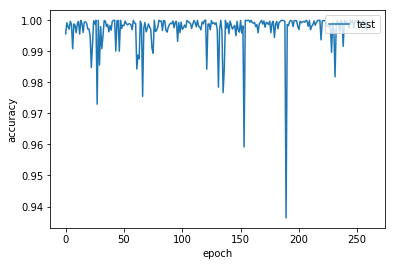

In [9]:
plt.plot(test_acc_list, label='test')
#plt.plot(test_epoch_list, test_loss_list, label='test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
#plt.legend(['train','test'], loc='upper right')
plt.legend(['test'], loc='upper right')
#plt.savefig("loss.png",dpi=250,format="png")
#plt.tight_layout()
plt.show()

(1484, 15, 5) (1484,) (262, 15, 5) (262,)


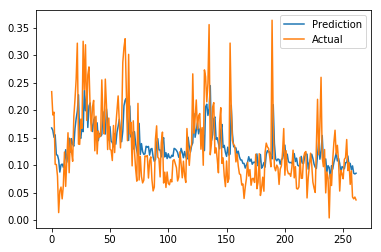

In [10]:
#plt.plot(result,color='red', label='Prediction')
#plt.plot(y_test,color='blue', label='Actual')
#plt.legend(loc='best')
#plt.show()
print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

plt.plot(result, label='Prediction')
plt.plot(y_test, label='Actual')
#plt.xlabel("epoch")
#plt.ylabel("loss")
plt.legend(['Prediction','Actual'], loc='upper right')
#plt.savefig("loss.png",dpi=250,format="png")
#plt.tight_layout()
plt.show()